# Techniques of High Performance Computing - Assignment 4

**Name: John Duffy**

**Student Number: 19154676**

# In the Moment of Heat

Reference: The SIAM 100-Digit Challenge: A Study in High-Accuracy Numerical Computing, Folkmar Bourneman et al

## Program Description

Order
Stability - Courant Number <= 1/4.
Precision

## Programming for Precision

General considerations...

Addition and multiplication good

Subtraction and division bad

Make numbers bigger before making them smaller

Maximise integer operations

Minimise floating point operations

Do floating point operations after integer operations


## Program Structure

The plate domain of [-1, 1] x [-1, 1] is translated to [0, 2] x [0, 2] for easier manipulation of array indexes and reduce computing complexity and time.

To investigate... a number of methods... using common paramter names as follows

* u(x, y) - an (x, y) position on the plate.

* N - the number of space grid points, and is common to the X and Y axis.

* M - the number of time points.

* h - the distance between space grid points, (N - 1) / 2.

* k - the distance between time points, (M - 1) / 2.

* C - the Courant number, k / h^2.

* T - The time the centre of the plate reaches 1.0

M and N are selected to be odd numbers to ensure an even number of space and time intervals, and so that the temperature of the centre of the plate is easily accessed as the array index, u[(N - 1) / 2, (N - 1) / 2].

### Methods



#### Central Differences in Space and Forward Euler in Time - CD_SPACE_FE_TIME_NUMBA_FLOAT64


#### Central Differences in Space and Forward Euler in Time - CD_SPACE_FE_TIME_ARRAY_SLICES_FLOAT64


#### Central Differences in Space and Forward Euler in Time - CD_SPACE_FE_TIME_ARRAY_SLICES_NUMEXPR_FLOAT64


#### Central Differences in Space and RK4 in Time - CD_SPACE_RK4_TIME_ARRAY_SLICES_FLOAT64


#### Central Differences in Space and RK4 in Time - CD_SPACE_RK4_TIME_ARRAY_SLICES_NUMEXPR_FLOAT64


#### Central Differences in Space and Forward Euler in Time - CD_SPACE_RK4_TIME_OPENCL_FLOAT32


#### Central Differences in Space and RK4 in Time - CD_SPACE_RK4_TIME_OPENCL_FLOAT32




## Performance and Optimisation

### Baseline Performance

To measure the relative performance of each method standard values of M, N were used as follows:

* M: 201

* N: 40001
    
Resulting in the following values of h, k and C:

* h: 0.01

* k: 0.000025

* C: 0.25

Because the Central Differences method used to determine u'(t) is second order accurate in h, with the above choice of parameters it should be possible to achieve an accuracy of 0.0001 in T.

The baseline results for each method are presented below:

    CD_SPACE_FE_TIME_NUMBA_FLOAT64
    N: 201
    M: 40001
    C: 0.25
    T: 0.4240000000000000
    Total time: 19.993767976760864

    CD_SPACE_FE_TIME_ARRAY_SLICES_FLOAT64
    N: 201
    M: 40001
    C: 0.25
    T: 0.4240000000000000
    Total time: 4.624581813812256
    
    CD_SPACE_FE_TIME_ARRAY_SLICES_INT64
    N: 201
    M: 40001
    C: 0.25
    T: 0.4240000000000000
    Total time: 4.513350009918213

    CD_SPACE_RK4_TIME_ARRAY_SLICES_FLOAT64
    N: 201
    M: 40001
    C: 0.25
    T: 0.4240250000000000
    Total time: 18.09891104698181
    
    CD_SPACE_RK4_TIME_ARRAY_SLICES_INT64
    N: 201
    M: 40001
    C: 0.25
    T: 0.4240250000000000
    Total time: 19.447755098342896

    CD_SPACE_FE_TIME_OPENCL_INT64
    N: 201
    M: 40001
    C: 0.25
    T: 0.4240000000000000
    Total time: 11.867632150650024

    CD_SPACE_RK4_TIME_OPENCL_INT64
    N: 201
    M: 40001
    C: 0.25
    T: 0.4240250000000000
    Total time: 26.951719045639038
    
As can been seen is the results above, all 6 methods are accurate to 4 decimal places as expected.

For the CD_SPACE_FE_TIME methods the ARRAY_SLICES method is significantly faster than the NUMBA method. This is probably due to Numba been able to parallelise array slicing very efficiently, and also the reduced function call overhead. Because of this increased speed, the ARRAY_SLICES method was selected to see how much further precision can be gained with a reduced space and time intervals.

As should be expected, the RK4 methods take longer due to the increased processing required.

### Increased Precision

    CD_SPACE_FE_TIME_ARRAY_SLICES_FLOAT64
    N: 501
    M: 250001
    C: 0.25
    T: 0.4240080000000000
    Total time: 196.95271515846252
    
    CD_SPACE_FE_TIME_ARRAY_SLICES_INT64
    N: 501
    M: 250001
    C: 0.25
    T: 0.4240080000000000
    Total time: 189.750324010849
    
    CD_SPACE_FE_TIME_OPENCL_INT64
    N: 501
    M: 250001
    C: 0.25
    T: 0.4240000000000000
    Total time: 202.91219091415405
    
    CD_SPACE_FE_TIME_ARRAY_SLICES_FLOAT64
    N: 501
    M: 500001
    C: 0.125
    T: 0.4240100000000000
    Total time: 353.85502219200134
    
    CD_SPACE_FE_TIME_OPENCL_INT64
    N: 501
    M: 500001
    C: 0.125
    T: 0.4240080000000000
    Total time: 405.8607587814331

    
    

### Numexpr Optimisation

    CD_SPACE_FE_TIME_ARRAY_SLICES_NUMEXPR_FLOAT64
    N: 201
    M: 40001
    C: 0.25
    T: 0.4240000000000000
    Total time: 2.956428050994873

    CD_SPACE_FE_TIME_ARRAY_SLICES_NUMEXPR_FLOAT64
    N: 201
    M: 80001
    C: 0.125
    T: 0.4240000000000000
    Total time: 5.976006746292114
    
    CD_SPACE_FE_TIME_ARRAY_SLICES_NUMEXPR_FLOAT64
    N: 201
    M: 160001
    C: 0.0625
    T: 0.4240062500000000
    Total time: 12.488371849060059

    CD_SPACE_FE_TIME_ARRAY_SLICES_NUMEXPR_FLOAT64
    N: 201
    M: 320001
    C: 0.03125
    T: 0.4240093750000000
    Total time: 25.41030192375183

    CD_SPACE_FE_TIME_ARRAY_SLICES_NUMEXPR_FLOAT64
    N: 201
    M: 640001
    C: 0.015625
    T: 0.4240109375000000
    Total time: 51.74851322174072

    CD_SPACE_FE_TIME_ARRAY_SLICES_NUMEXPR_FLOAT64
    N: 201
    M: 1280001
    C: 0.0078125
    T: 0.4240109375000000
    Total time: 106.36803412437439
    
    CD_SPACE_FE_TIME_ARRAY_SLICES_NUMEXPR_FLOAT64
    N: 201
    M: 2560001
    C: 0.00390625
    T: 0.4240113281250000
    Total time: 210.5399420261383

    CD_SPACE_FE_TIME_ARRAY_SLICES_NUMEXPR_FLOAT64
    N: 501
    M: 250001
    C: 0.25
    T: 0.4240080000000000
    Total time: 85.76607894897461
    
    CD_SPACE_FE_TIME_ARRAY_SLICES_NUMEXPR_FLOAT64
    N: 501
    M: 500001
    C: 0.125
    T: 0.4240100000000000
    Total time: 197.55218410491943

    CD_SPACE_FE_TIME_ARRAY_SLICES_NUMEXPR_FLOAT64
    N: 501
    M: 1000001
    C: 0.0625
    T: 0.4240110000000000
    Total time: 350.5847067832947

    CD_SPACE_FE_TIME_ARRAY_SLICES_NUMEXPR_FLOAT64
    N: 501
    M: 2000001
    C: 0.03125
    T: 0.4240110000000000
    Total time: 714.4203388690948

    CD_SPACE_FE_TIME_ARRAY_SLICES_NUMEXPR_FLOAT64
    N: 501
    M: 4000001
    C: 0.015625
    T: 0.4240112500000000
    Total time: 1403.1136918067932
    
    CD_SPACE_FE_TIME_ARRAY_SLICES_NUMEXPR_FLOAT64
    N: 501
    M: 8000001
    C: 0.0078125
    T: 0.4240113750000000
    Total time: 2813.200270175934
    
    CD_SPACE_FE_TIME_ARRAY_SLICES_NUMEXPR_FLOAT64
    N: 501
    M: 16000001
    C: 0.00390625
    T: 0.4240114375000000
    Total time: 6017.949345111847

    CD_SPACE_FE_TIME_ARRAY_SLICES_NUMEXPR_FLOAT64
    N: 1001
    M: 1000001
    C: 0.25
    T: 0.4240110000000000
    Total time: 1560.2571458816528
    
    CD_SPACE_FE_TIME_ARRAY_SLICES_NUMEXPR_FLOAT64
    N: 1001
    M: 2000001
    C: 0.125
    T: 0.4240110000000000
    Total time: 3129.7784192562103
    
    CD_SPACE_FE_TIME_ARRAY_SLICES_NUMEXPR_FLOAT64
    N: 1001
    M: 4000001
    C: 0.0625
    T: 0.4240112500000000
    Total time: 6244.440460920334
    
    CD_SPACE_FE_TIME_ARRAY_SLICES_NUMEXPR_FLOAT64
    N: 1001
    M: 8000001
    C: 0.03125
    T: 0.4240113750000000
    Total time: 12418.319234848022
    
    CD_SPACE_FE_TIME_ARRAY_SLICES_NUMEXPR_FLOAT64
    N: 1001
    M: 16000001
    C: 0.015625
    T: 0.4240113750000000
    Total time: 24931.435096025467
    
### OpenCL RK4

    CD_SPACE_RK4_TIME_OPENCL_INT64
    N: 201
    M: 40001
    C: 0.25
    T: 0.4240000000000000
    Total time: 22.751407146453857
    
    CD_SPACE_RK4_TIME_OPENCL_INT64
    N: 201
    M: 80001
    C: 0.125
    T: 0.4240125000000000
    Total time: 43.223504066467285
    
    CD_SPACE_RK4_TIME_OPENCL_INT64
    N: 201
    M: 160001
    C: 0.0625
    T: 0.4240125000000000
    Total time: 87.23664832115173
    
    CD_SPACE_RK4_TIME_OPENCL_INT64
    N: 201
    M: 320001
    C: 0.03125
    T: 0.4240125000000000
    Total time: 173.38553094863892
    
### RK4

    CD_SPACE_RK4_TIME_ARRAY_SLICES_FLOAT64
    N: 201
    M: 40001
    C: 0.25
    T: 0.4240250000000000
    Total time: 18.64218497276306
    
    CD_SPACE_RK4_TIME_ARRAY_SLICES_FLOAT64
    N: 201
    M: 80001
    C: 0.125
    T: 0.4240125000000000
    Total time: 36.49519991874695
    
    CD_SPACE_RK4_TIME_ARRAY_SLICES_FLOAT64
    N: 201
    M: 160001
    C: 0.0625
    T: 0.4240125000000000
    Total time: 74.27023482322693
    
    CD_SPACE_RK4_TIME_ARRAY_SLICES_FLOAT64
    N: 201
    M: 320001
    C: 0.03125
    T: 0.4240125000000000
    Total time: 153.51972603797913
    
    CD_SPACE_RK4_TIME_ARRAY_SLICES_FLOAT64
    N: 201
    M: 2560001
    C: 0.00390625
    T: 0.4240121093750000
    Total time: 1095.1646540164948


In [1]:
# Import required libraries...

import pyopencl as cl
import numexpr as ne
import numpy as np
import time

from numba import njit, prange

In [2]:
# declare a utility array plotting function...

import matplotlib.pyplot as plt

def plot(u):
    plt.figure(figsize=(8, 6))
    plt.imshow(u, origin='lower', extent=(-1, 1, -1, 1), cmap='Reds')
    plt.colorbar()
    plt.show()

In [3]:
# Declare a useful timer class...

class Timer:
    def __enter__(self):
        self.start = time.time()
        return self

    def __exit__(self, *args):
        self.end = time.time()
        self.interval = self.end - self.start

### CD_SPACE_FE_TIME_NUMBA_FLOAT64

In [5]:
@njit(parallel=True)
def step(n, m, u):
    '''
    This function
    '''
    v = np.copy(u)
    for row in range(1, n - 1):
        for col in prange(1, n - 1):
            v[row, col] = u[row, col] - (4 * u[row, col] - u[row - 1, col] - u[row + 1, col] - u[row, col - 1] - u[row, col + 1]) * (n - 1) * (n - 1) / (4 * (m - 1))

    return v

CD_SPACE_FE_TIME_NUMBA_FLOAT64
N: 201
M: 40001
C: 0.25
T: 0.4240000000000000
Total time: 21.97308111190796


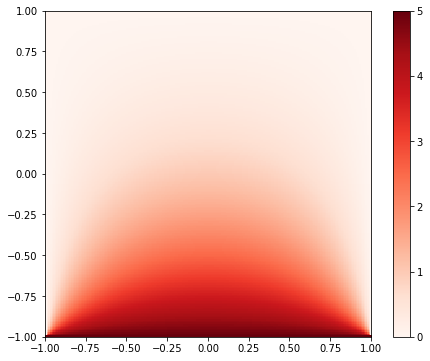

In [6]:
N = 201
M = 40001

print("CD_SPACE_FE_TIME_NUMBA_FLOAT64")
print("N: {}".format(N))
print("M: {}".format(M))
print("C: {}".format(((N - 1) * (N - 1)) / (4 * (M - 1))))

u = np.zeros((N, N), dtype=np.float64)

u[0, :] = 5.0

i = 0

with Timer() as t:
    
    while u[(N - 1) // 2, (N - 1) // 2] < 1.0:  # Temperature at centre of plate.
        u = step(N, M, u)
        i = i + 1
    
print("T: {:.16f}".format(i / (M - 1)))
print("Total time: {0}".format(t.interval))

plot(u)

### CD_SPACE_FE_TIME_ARRAY_SLICES_FLOAT64

CD_SPACE_FE_TIME_ARRAY_SLICES_FLOAT64
N: 201
M: 40001
C: 0.25
T: 0.4240000000000000
Total time: 5.443129301071167


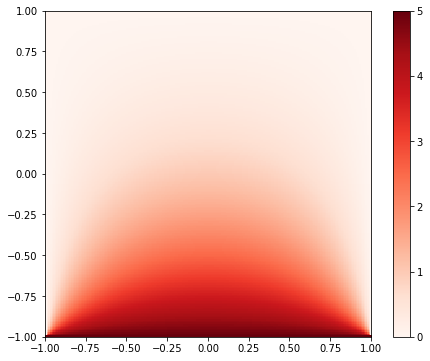

In [7]:
N = 201
M = 40001

print("CD_SPACE_FE_TIME_ARRAY_SLICES_FLOAT64")
print("N: {}".format(N))
print("M: {}".format(M))
print("C: {}".format(((N - 1) * (N - 1)) / (4 * (M - 1))))

u = np.zeros((N, N), dtype=np.float64)

u[0, :] = 5.0

i = 0

with Timer() as t:
    
    while u[(N - 1) // 2, (N - 1) // 2] < 1.0:  # Temperature at centre of plate.
        u[1:N-1, 1:N-1] = u[1:N-1, 1:N-1] + (u[0:N-2, 1:N-1] + u[2:N, 1:N-1] + u[1:N-1, 0:N-2] + u[1:N-1, 2:N] - 4 * u[1:N-1, 1:N-1]) * (N - 1) * (N - 1) / (4 * (M - 1))
        i = i + 1

print("T: {:.16f}".format(i / (M - 1)))
print("Total time: {0}".format(t.interval))

plot(u)

### CD_SPACE_FE_TIME_ARRAY_SLICES_NUMEXPR_FLOAT64

CD_SPACE_FE_TIME_ARRAY_SLICES_NUMEXPR_FLOAT64
N: 1001
M: 16000001
C: 0.015625
T: 0.4240113750000000
Total time: 24931.435096025467


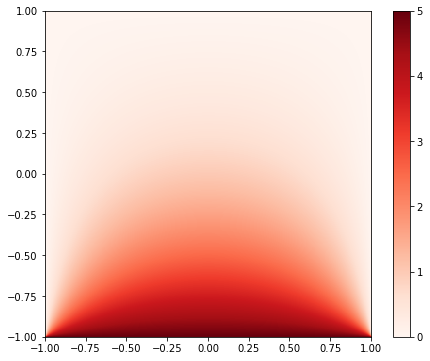

In [77]:
N = 1001
M = 16000001

print("CD_SPACE_FE_TIME_ARRAY_SLICES_NUMEXPR_FLOAT64")
print("N: {}".format(N))
print("M: {}".format(M))
print("C: {}".format(((N - 1) * (N - 1)) / (4 * (M - 1))))

u = np.zeros((N, N), dtype=np.float64)

u[0, :] = 5.0

i = 0

with Timer() as t:

    while u[(N - 1) // 2, (N - 1) // 2] < 1.0:  # Temperature at centre of plate.

        a = u[1:N-1, 1:N-1]
        b = u[0:N-2, 1:N-1]
        c = u[2:N, 1:N-1]
        d = u[1:N-1, 0:N-2]
        e = u[1:N-1, 2:N]

        u[1:N-1, 1:N-1] = ne.evaluate("a + (b + c + d + e - 4 * a) * (N - 1) * (N - 1) / (4 * (M - 1))")
        i = i + 1

print("T: {:.16f}".format(i / (M - 1)))
print("Total time: {0}".format(t.interval))

plot(u)

### CD_SPACE_RK4_TIME_ARRAY_SLICES_FLOAT64

In [68]:
@njit
def f(n, m, u, v):
    v[1:N-1, 1:N-1] = (u[0:N-2, 1:N-1] + u[2:N, 1:N-1] + u[1:N-1, 0:N-2] + u[1:N-1, 2:N] - 4 * u[1:N-1, 1:N-1]) * (n - 1) * (n - 1) / (4 * (m - 1))

@njit
def rk4_func(n, m, u):

    k1 = np.zeros((n, n), dtype=u.dtype)
    k2 = np.zeros((n, n), dtype=u.dtype)
    k3 = np.zeros((n, n), dtype=u.dtype)
    k4 = np.zeros((n, n), dtype=u.dtype)
    
    f(n, m, u, k1)
    f(n, m, u + k1 / 2, k2)
    f(n, m, u + k2 / 2, k3)
    f(n, m, u + k3, k4)
    
    return u + (k1 + 2 * k2 + 2 * k3 + k4) / 6

In [75]:
N = 501
M = 250001

print("CD_SPACE_RK4_TIME_ARRAY_SLICES_FLOAT64")
print("N: {}".format(N))
print("M: {}".format(M))
print("C: {}".format(((N - 1) * (N - 1)) / (4 * (M - 1))))

u = np.zeros((N, N), dtype=np.float64)

u[0, :] = 5.0

i = 0

with Timer() as t:
    
    while u[(N - 1) // 2, (N - 1) // 2] < 1.0:
        u = rk4_func(N, M, u)
        i = i + 1

print("T: {:.16f}".format(i / (M - 1)))
print("Total time: {0}".format(t.interval))

plot(u)

CD_SPACE_RK4_TIME_ARRAY_SLICES_FLOAT64
N: 501
M: 250001
C: 0.25


KeyboardInterrupt: 

### CD_SPACE_RK4_TIME_ARRAY_SLICES_NUMEXPR_FLOAT64

CD_SPACE_RK4_TIME_ARRAY_SLICES_NUMEXPR_FLOAT64
N: 201
M: 40001
C: 0.25
T: 0.4792500000000000
Total time: 36.63894319534302


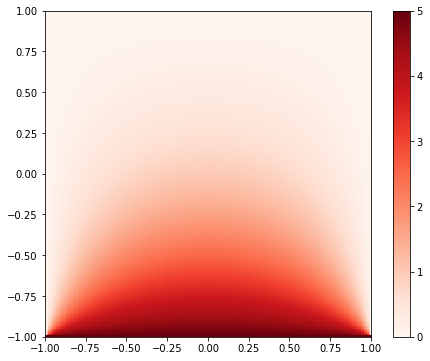

In [70]:
N = 201
M = 40001

print("CD_SPACE_RK4_TIME_ARRAY_SLICES_NUMEXPR_FLOAT64")
print("N: {}".format(N))
print("M: {}".format(M))
print("C: {}".format(((N - 1) * (N - 1)) / (4 * (M - 1))))

u = np.zeros((N, N), dtype=np.float64)

u[0, :] = 5.0

k1 = np.zeros((N, N), dtype=np.float64)
k2 = np.zeros((N, N), dtype=np.float64)
k3 = np.zeros((N, N), dtype=np.float64)
k4 = np.zeros((N, N), dtype=np.float64)

i = 0

with Timer() as t:
    
    while u[(N - 1) // 2, (N - 1) // 2] < 1.0:  # Temperature at centre of plate.

        a = u[1:N-1, 1:N-1]
        b = u[0:N-2, 1:N-1]
        c = u[2:N, 1:N-1]
        d = u[1:N-1, 0:N-2]
        e = u[1:N-1, 2:N]

        k1[1:N-1, 1:N-1] = ne.evaluate("(b + c + d + e - 4 * a) * (N - 1) * (N - 1) / (4 * (M - 1))")
    
        a = u[1:N-1, 1:N-1] + k1[1:N-1, 1:N-1] / 2
        b = u[0:N-2, 1:N-1] + k1[0:N-2, 1:N-1] / 2
        c = u[2:N, 1:N-1]   + k1[2:N, 1:N-1] / 2
        d = u[1:N-1, 0:N-2] + k1[1:N-1, 0:N-2] / 2
        e = u[1:N-1, 2:N]   + k1[N-1, 2:N] / 2

        k2[1:N-1, 1:N-1] = ne.evaluate("(b + c + d + e - 4 * a) * (N - 1) * (N - 1) / (4 * (M - 1))")
    
        a = u[1:N-1, 1:N-1] + k2[1:N-1, 1:N-1] / 2
        b = u[0:N-2, 1:N-1] + k2[0:N-2, 1:N-1] / 2
        c = u[2:N, 1:N-1]   + k2[2:N, 1:N-1] / 2
        d = u[1:N-1, 0:N-2] + k2[1:N-1, 0:N-2] / 2
        e = u[1:N-1, 2:N]   + k2[N-1, 2:N] / 2

        k3[1:N-1, 1:N-1] = ne.evaluate("(b + c + d + e - 4 * a) * (N - 1) * (N - 1) / (4 * (M - 1))")

        a = u[1:N-1, 1:N-1] + k3[1:N-1, 1:N-1]
        b = u[0:N-2, 1:N-1] + k3[0:N-2, 1:N-1]
        c = u[2:N, 1:N-1]   + k3[2:N, 1:N-1]
        d = u[1:N-1, 0:N-2] + k3[1:N-1, 0:N-2]
        e = u[1:N-1, 2:N]   + k3[N-1, 2:N]

        k4[1:N-1, 1:N-1] = ne.evaluate("(b + c + d + e - 4 * a) * (N - 1) * (N - 1) / (4 * (M - 1))")

        u = ne.evaluate("u + (k1 + 2 * k2 + 2 * k3 + k4) / 6")

        i = i + 1
        
print("T: {:.16f}".format(i / (M - 1)))
print("Total time: {0}".format(t.interval))

plot(u)

### CD_SPACE_FE_TIME_OPENCL_FLOAT32

In [52]:
# Define the OpenCL kernel string used in the class FiniteDifference. It is defined here outside
# of the class for readability, and also so that it may be developed/debugged externally and
# easily included here as part of a build system.

kernel_string = """

__kernel void kernel_cd_fe_float32
    (
        const int n, \
        const int m, \
        __global float * restrict u, \
        __global float * restrict v, \
        __global float * restrict temperature
    )
{
    // Retrieve row and column indexes from the global work group ids.
    
    int r = get_global_id(0);
    int c = get_global_id(1);

    // Implement the finite differences scheme on the interior grid points.

    if (r > 0 && r < n - 1 && c > 0 && c < n - 1) {

        v[n * r + c] = u[n * r + c] + \
            (u[n * (r - 1) + c] + u[n * (r + 1) + c] + u[n * r + (c - 1)] + u[n * r + (c + 1)] - 4 * u[n * r + c]) * \
            (n - 1) * (n - 1) / (4 * (m - 1));

    }
    else {
        v[n * r + c] = u[n * r + c];
    }

    // All calculations of v must be complete before continuing.

    barrier(CLK_GLOBAL_MEM_FENCE);

    // Export the temperature of the centre of the plate.
    
    if (r == (n - 1) / 2 && c == (n - 1) / 2) {
        temperature[0] = v[n * r + c];
    }

    // Get ready for the next step by copying v to u. This retains data in the device between iterations.

    u[n * r + c] = v[n * r + c];
}

"""


# Define the class.

class CD_FE:
    """
    This class...
    """
    
    def __init__(self, n, m):
        """
        This constructor...
        """
        
        # Store the n and m as instance variables for access by class methods.
        
        self.n = n
        self.m = m
                
        # Create a GPU specific context and command queue.
        
        self.ctx = cl.Context(dev_type = cl.device_type.GPU)
        
        self.queue = cl.CommandQueue(self.ctx, properties=cl.command_queue_properties.PROFILING_ENABLE)
 
        # Create input and output buffers u and v as READ_WRITE because we may read the result from u or v.
 
        self.u = cl.Buffer(self.ctx, cl.mem_flags.READ_WRITE, size=np.dtype(np.float32).itemsize * n * n)
        self.v = cl.Buffer(self.ctx, cl.mem_flags.READ_WRITE, size=np.dtype(np.float32).itemsize * n * n)
                        
        # Create a buffer to hold the current temperature of the centre of the plate.
        
        self.temperature = cl.Buffer(self.ctx, cl.mem_flags.READ_WRITE, size=np.dtype(np.float32).itemsize)

        # Build the kernel.
        
        self.kernel = cl.Program(self.ctx, kernel_string).build().kernel_cd_fe_float32


    def copy_u_to_device(self, u):
        cl.enqueue_copy(self.queue, self.u, u)


    def copy_v_from_device(self):
        v = np.zeros((self.n, self.n), dtype=np.float32)
        cl.enqueue_copy(self.queue, v, self.v)            
        return v


    def copy_temperature_from_device(self):
        temperature = np.zeros((1), dtype=np.float32)
        cl.enqueue_copy(self.queue, temperature, self.temperature)            
        return temperature[0]

           
    def step(self):
        """
        This method...
        """     
        self.kernel(self.queue, (self.n, self.n), None,
            np.int32(self.n),
            np.int32(self.m),
            self.u,
            self.v,
            self.temperature)

CD_SPACE_FE_TIME_OPENCL_FLOAT32
N: 201
M: 40001
C: 0.25
T: 0.4240000000000000
Total time: 7.118159770965576


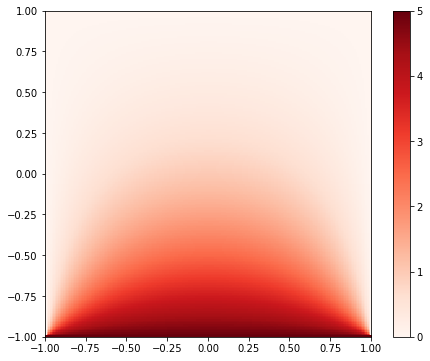

In [53]:
N = 201
M = 40001

print("CD_SPACE_FE_TIME_OPENCL_FLOAT32")
print("N: {}".format(N))
print("M: {}".format(M))
print("C: {}".format(((N - 1) * (N - 1)) / (4 * (M - 1))))

u = np.zeros((N, N), dtype=np.float32)

u[0, :] = 5.0

cd_fe = CD_FE(N, M)

cd_fe.copy_u_to_device(u)

i = 0

with Timer() as t:

    while True:
        cd_fe.step()
        i = i + 1
        temperature = cd_fe.copy_temperature_from_device()
        if not temperature < 1.0:
            v = cd_fe.copy_v_from_device()
            break
        
print("T: {:.16f}".format(i / (M - 1)))
print("Total time: {0}".format(t.interval))

plot(v)

### CD_SPACE_RK4_TIME_OPENCL_FLOAT32

In [54]:
# Define the OpenCL kernel string used in the class FiniteDifference. It is defined here outside
# of the class for readability, and also so that it may be developed/debugged externally and
# easily included here as part of a build system.

kernel_string = """

__kernel void kernel_cd_rk4_float32
    (
        const int n, \
        const int m, \
        __global float * restrict u, \
        __global float * restrict v, \
        __global float * restrict k1, \
        __global float * restrict k2, \
        __global float * restrict k3, \
        __global float * restrict k4, \
        __global float * restrict temperature
    )
{
    // Retrieve row and column indices from the global workspace ids.
    
    int r = get_global_id(0);
    int c = get_global_id(1);

    // Implement the finite difference scheme on the interior points.

    if (r > 0 && r < n - 1 && c > 0 && c < n - 1) {

        k1[n * r + c] = ( \
            u[n * (r - 1) + c] + \
            u[n * (r + 1) + c] + \
            u[n * r + (c - 1)] + \
            u[n * r + (c + 1)] - 4 * u[n * r + c]) * \
            (n - 1) * (n - 1) / (4 * (m - 1));

        // All calculations of k1 must be complete before continuing.
    
        barrier(CLK_GLOBAL_MEM_FENCE);

        k2[n * r + c] = ( \
            u[n * (r - 1) + c] + k1[n * (r - 1) + c] / 2 + \
            u[n * (r + 1) + c] + k1[n * (r + 1) + c] / 2 + \
            u[n * r + (c - 1)] + k1[n * r + (c - 1)] / 2 + \
            u[n * r + (c + 1)] + k1[n * r + (c + 1)] / 2 -  \
            4 * (u[n * r + c] + k1[n * r + c] / 2)) * (n - 1) * (n - 1) / (4 * (m - 1));

        // All calculations of k2 must be complete before continuing.
    
        barrier(CLK_GLOBAL_MEM_FENCE);
    
        k3[n * r + c] = ( \
            u[n * (r - 1) + c] + k2[n * (r - 1) + c] / 2 + \
            u[n * (r + 1) + c] + k2[n * (r + 1) + c] / 2 + \
            u[n * r + (c - 1)] + k2[n * r + (c - 1)] / 2 + \
            u[n * r + (c + 1)] + k2[n * r + (c + 1)] / 2 - \
            4 * (u[n * r + c] + k2[n * r + c] / 2)) * (n - 1) * (n - 1) / (4 * (m - 1));

        // All calculations of k3 must be complete before continuing.
    
        barrier(CLK_GLOBAL_MEM_FENCE);

        k4[n * r + c] = ( \
            u[n * (r - 1) + c] + k3[n * (r - 1) + c] + \
            u[n * (r + 1) + c] + k3[n * (r + 1) + c] + \
            u[n * r + (c - 1)] + k3[n * r + (c - 1)] + \
            u[n * r + (c + 1)] + k3[n * r + (c + 1)] - \
            4 * (u[n * r + c] + k3[n * r + c])) * (n - 1) * (n - 1) / (4 * (m - 1));            

        // All calculations of k4 must be complete before continuing.

        barrier(CLK_GLOBAL_MEM_FENCE);
        
        // RK4.
    
        v[n * r + c] = u[n * r + c] + (k1[n * r + c] + 2 * k2[n * r + c] + 2 * k3[n * r + c] + k4[n * r + c]) / 6;

    }
    else {
        v[n * r + c] = u[n * r + c];
    }

    // All calculations of v must be complete before continuing.

    barrier(CLK_GLOBAL_MEM_FENCE);

    // Export the temperature of the centre of the plate.
    
    if (r == (n - 1) / 2 && c == (n - 1) / 2) {
        temperature[0] = v[n * r + c];
    }

    // Get ready for the next step by copying v to u. This retains data on the device in between iterations.

    u[n * r + c] = v[n * r + c];
}

"""


# Define the class.

class CD_RK4:
    """
    This class...
    """
    
    def __init__(self, n, m):
        """
        This constructor...
        """
        
        # Store the n and m as instance variables for access by class methods.
        
        self.n = n
        self.m = m
                
        # Create a GPU specific context and command queue.
        
        self.ctx = cl.Context(dev_type = cl.device_type.GPU)
        
        self.queue = cl.CommandQueue(self.ctx, properties=cl.command_queue_properties.PROFILING_ENABLE)
 
        # Create input and output buffers u and v as READ_WRITE because we read an write to both buffers.
 
        self.u = cl.Buffer(self.ctx, cl.mem_flags.READ_WRITE, size=np.dtype(np.float32).itemsize * n * n)
        self.v = cl.Buffer(self.ctx, cl.mem_flags.READ_WRITE, size=np.dtype(np.float32).itemsize * n * n)
        
        # Create buffers to hold the intermediate Runge-Kutta values.
        
        self.k1 = cl.Buffer(self.ctx, cl.mem_flags.READ_WRITE, size=np.dtype(np.float32).itemsize * n * n)
        self.k2 = cl.Buffer(self.ctx, cl.mem_flags.READ_WRITE, size=np.dtype(np.float32).itemsize * n * n)
        self.k3 = cl.Buffer(self.ctx, cl.mem_flags.READ_WRITE, size=np.dtype(np.float32).itemsize * n * n)
        self.k4 = cl.Buffer(self.ctx, cl.mem_flags.READ_WRITE, size=np.dtype(np.float32).itemsize * n * n)
                
        # Create a buffer to hold the current temperature of the centre of the plate.
        
        self.temperature = cl.Buffer(self.ctx, cl.mem_flags.READ_WRITE, size=np.dtype(np.float32).itemsize)

        # Build the kernel.
        
        self.kernel = cl.Program(self.ctx, kernel_string).build().kernel_cd_rk4_float32


    def copy_u_to_device(self, u):
        cl.enqueue_copy(self.queue, self.u, u)


    def copy_k1_to_device(self, k1):
        cl.enqueue_copy(self.queue, self.k1, k1)


    def copy_k2_to_device(self, k2):
        cl.enqueue_copy(self.queue, self.k2, k2)


    def copy_k3_to_device(self, k3):
        cl.enqueue_copy(self.queue, self.k3, k3)


    def copy_k4_to_device(self, k4):
        cl.enqueue_copy(self.queue, self.k4, k4)


    def copy_v_from_device(self):
        v = np.zeros((self.n, self.n), dtype=np.float32)
        cl.enqueue_copy(self.queue, v, self.v)            
        return v


    def copy_temperature_from_device(self):
        temperature = np.zeros((1), dtype=np.float32)
        cl.enqueue_copy(self.queue, temperature, self.temperature)            
        return temperature[0]

           
    def step(self):
        """
        This method...
        """     
        self.kernel(self.queue, (self.n, self.n), None,
            np.int32(self.n),
            np.int32(self.m),
            self.u,
            self.v,
            self.k1,
            self.k2,
            self.k3,
            self.k4,
            self.temperature)

CD_SPACE_RK4_TIME_OPENCL_FLOAT32
N: 201
M: 40001
C: 0.25
T: 0.4239750000000000
Total time: 11.523745059967041


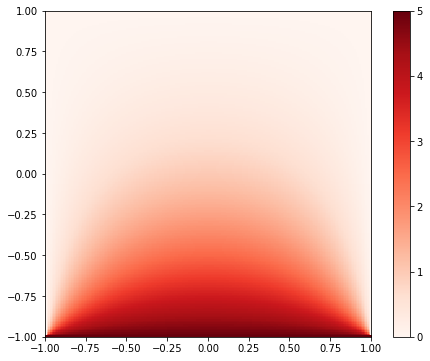

In [55]:
N = 201
M = 40001

print("CD_SPACE_RK4_TIME_OPENCL_FLOAT32")
print("N: {}".format(N))
print("M: {}".format(M))
print("C: {}".format(((N - 1) * (N - 1)) / (4 * (M - 1))))

u = np.zeros((N, N), dtype=np.float32)

u[0, :] = 5.0

k1 = np.zeros((N, N), dtype=u.dtype)
k2 = np.zeros((N, N), dtype=u.dtype)
k3 = np.zeros((N, N), dtype=u.dtype)
k4 = np.zeros((N, N), dtype=u.dtype)

cd_rk4 = CD_RK4(N, M)

cd_rk4.copy_u_to_device(u)

cd_rk4.copy_k1_to_device(k1)
cd_rk4.copy_k2_to_device(k2)
cd_rk4.copy_k3_to_device(k3)
cd_rk4.copy_k4_to_device(k4)

i = 0

with Timer() as t:

    while True:
        cd_rk4.step()
        i = i + 1
        temperature = cd_rk4.copy_temperature_from_device()
        if not temperature < 1.0:
            v = cd_rk4.copy_v_from_device()
            break

v = cd_rk4.copy_v_from_device()
        
print("T: {:.16f}".format(i / (M - 1)))
print("Total time: {0}".format(t.interval))

plot(v)